In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
dataset_path = "retail_sales.csv"
df = pd.read_csv(dataset_path)

# Drop unnecessary columns if any (keeping only relevant features)
df.drop(columns=["Product_ID"], inplace=True)  # Assuming Product_ID is not needed for ML models

# Handling missing values
# Since Demand_Forecast is empty, we fill it with median of Units_Sold
df["Demand_Forecast"].fillna(df["Units_Sold"].median(), inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_cols = ["Store_ID", "Category", "Subcategory", "Brand", "Region", "Holiday_Promotion", "Weather_Condition", "Customer_Type"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Feature Engineering (Creating new useful features)
df["Price_After_Discount"] = df["Price_INR"] * (1 - df["Discount_%"] / 100)
df["Revenue_Per_Unit"] = df["Revenue_INR"] / df["Units_Sold"]
df.drop(columns=["Price_INR", "Discount_%", "Revenue_INR"], inplace=True)  # Drop original columns

# Scaling numerical features
scaler = StandardScaler()
numerical_cols = ["Units_Sold", "Inventory_Level", "Demand_Forecast", "Competitor_Pricing_INR", "Loyalty_Score", "Price_After_Discount", "Revenue_Per_Unit"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Splitting data into train & test sets
X = df.drop(columns=["Units_Sold"])  # Predicting sales (Units_Sold)
y = df["Units_Sold"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save preprocessed data
preprocessed_train_path = "data/retail_train.csv"
preprocessed_test_path = "data/retail_test.csv"
X_train.to_csv(preprocessed_train_path, index=False)
X_test.to_csv(preprocessed_test_path, index=False)

print("Preprocessing complete. Training and testing datasets saved.")

C:\Users\PAVAN RAJ KAMAL\AppData\Local\Temp\ipykernel_9928\4162165165.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Demand_Forecast"].fillna(df["Units_Sold"].median(), inplace=True)


Preprocessing complete. Training and testing datasets saved.


In [2]:
df = pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    100000 non-null  object 
 1   Store_ID                100000 non-null  object 
 2   Product_ID              100000 non-null  object 
 3   Category                100000 non-null  object 
 4   Subcategory             100000 non-null  object 
 5   Brand                   100000 non-null  object 
 6   Region                  100000 non-null  object 
 7   Units_Sold              100000 non-null  int64  
 8   Price_INR               100000 non-null  float64
 9   Discount_%              100000 non-null  float64
 10  Revenue_INR             100000 non-null  float64
 11  Inventory_Level         100000 non-null  int64  
 12  Demand_Forecast         0 non-null       float64
 13  Competitor_Pricing_INR  100000 non-null  float64
 14  Holiday_Promotion    

In [2]:
import pandas as pd

# Load dataset
file_path = "retail_sales.csv"  # Ensure the correct file path
df = pd.read_csv(file_path)

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Fill missing Demand_Forecast using a 7-day moving average of Units_Sold
df["Demand_Forecast"] = df["Units_Sold"].rolling(window=7, min_periods=1).mean()

# Prepare data for Prophet
df_prophet = df[["Date", "Units_Sold"]].rename(columns={"Date": "ds", "Units_Sold": "y"})

# Save processed data for Prophet training
df_prophet.to_csv("processed_retail_sales.csv", index=False)

# Display the first few rows
print(df_prophet.head())

          ds   y
0 2024-11-23  24
1 2024-01-17  35
2 2024-08-17  15
3 2024-02-22   9
4 2024-07-12  20


In [3]:
import pandas as pd

# Load processed data
df = pd.read_csv("processed_retail_sales.csv")

# Check structure
print(df.head())  # Should show 'ds' and 'y' columns
print(df.dtypes)  # 'ds' should be datetime64 and 'y' should be int/float

# Convert ds column to datetime if needed
df["ds"] = pd.to_datetime(df["ds"])

           ds   y
0  2024-11-23  24
1  2024-01-17  35
2  2024-08-17  15
3  2024-02-22   9
4  2024-07-12  20
ds    object
y      int64
dtype: object


In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)

# Save train and test CSVs
df_train.to_csv("train.csv", index=False)
df_test.to_csv("test.csv", index=False)

In [5]:
from prophet import Prophet

# Load train dataset
df_train = pd.read_csv("train.csv")

# Ensure ds column is datetime type
df_train["ds"] = pd.to_datetime(df_train["ds"])

# Initialize Prophet model
model = Prophet()

# Fit model
model.fit(df_train)

c:\Users\PAVAN RAJ KAMAL\.conda\envs\my_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
09:26:22 - cmdstanpy - INFO - Chain [1] start processing
09:26:35 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Load test dataset
df_test = pd.read_csv("test.csv")

# Ensure ds column is datetime type
df_test["ds"] = pd.to_datetime(df_test["ds"])

# Predict sales on test dataset
future = df_test[["ds"]]  # Use test dataset dates
forecast = model.predict(future)

# Display forecasted results
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].head())

# Save predictions
forecast.to_csv("forecast_results.csv", index=False)

          ds       yhat  yhat_lower  yhat_upper
0 2024-01-01  19.346605    6.668464   31.529994
1 2024-01-01  19.346605    6.892633   31.263395
2 2024-01-01  19.346605    6.750451   31.876478
3 2024-01-01  19.346605    6.889757   31.256942
4 2024-01-01  19.346605    7.290847   31.474889


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Merge actual test values with predictions
df_results = df_test.merge(forecast[["ds", "yhat"]], on="ds")

# Calculate evaluation metrics
mae = mean_absolute_error(df_results["y"], df_results["yhat"])
rmse = np.sqrt(mean_squared_error(df_results["y"], df_results["yhat"]))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 7.883476714161608
Root Mean Squared Error (RMSE): 9.748945550479462


In [9]:
df.columns

Index(['ds', 'y'], dtype='object')

09:43:00 - cmdstanpy - INFO - Chain [1] start processing
09:43:03 - cmdstanpy - INFO - Chain [1] done processing


          ds       yhat
0 2024-01-01  19.272124
1 2024-01-01  19.272124
2 2024-01-01  19.272124
3 2024-01-01  19.272124
4 2024-01-01  19.272124


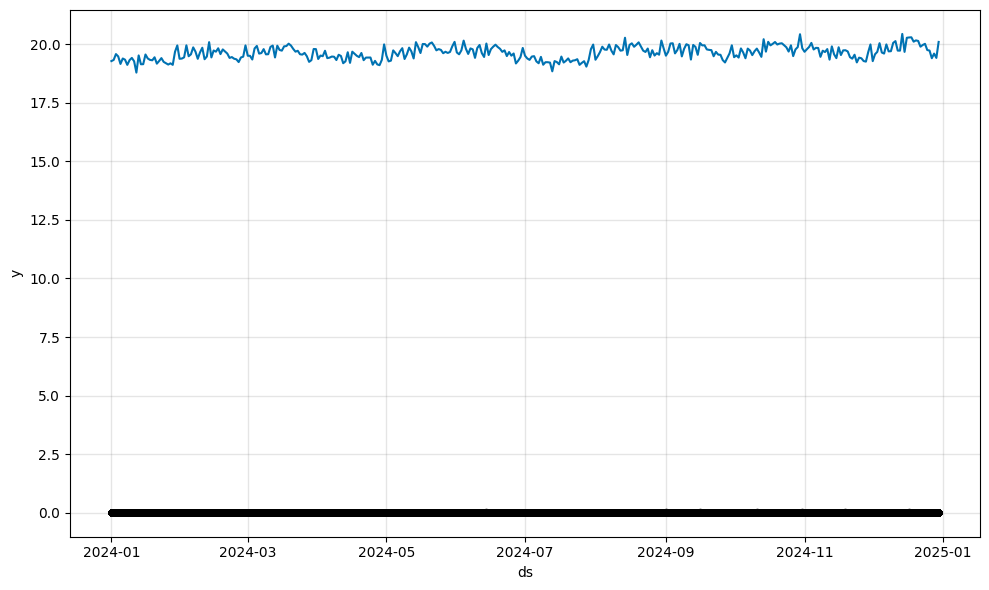

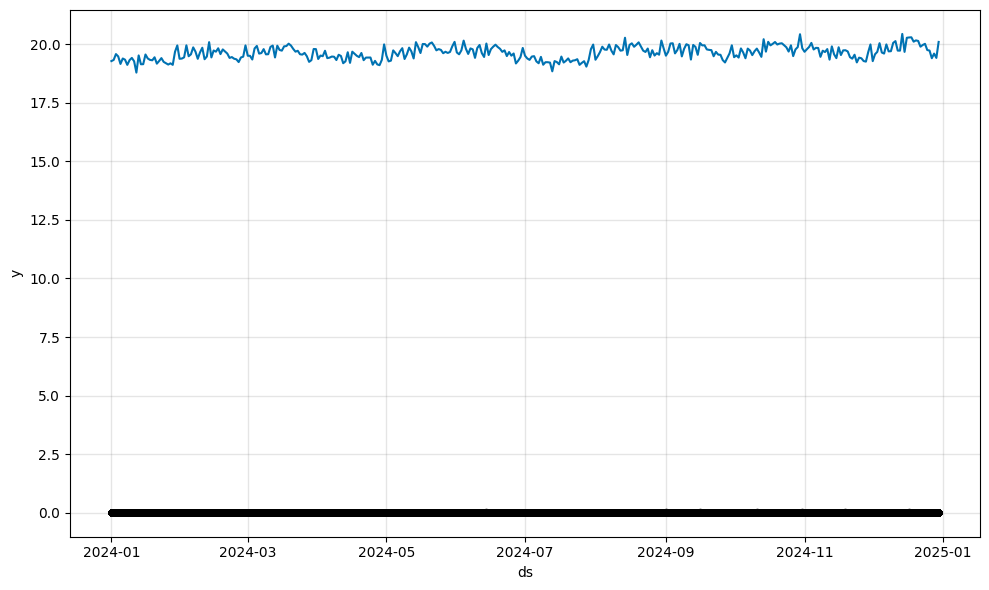

In [20]:
import pandas as pd
from prophet import Prophet

# Load Data
df = pd.read_csv("processed_retail_sales.csv")
df['ds'] = pd.to_datetime(df['ds'])

# 🔹 Scale Down 'y' for Stability
df['y'] = df['y'] / 1000  

# Train-Test Split
split_index = int(len(df) * 0.8)
df_train = df.iloc[:split_index].copy()
df_test = df.iloc[split_index:].copy()

# Initialize Prophet
model = Prophet(
    changepoint_prior_scale=0.2,  # 🔹 Increased to detect trends better
    seasonality_prior_scale=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

# 🔹 Add Seasonalities
model.add_seasonality(name='weekly', period=7, fourier_order=10)
model.add_seasonality(name='monthly', period=30.5, fourier_order=15)

# Train Model
model.fit(df_train[['ds', 'y']])

# Predict
future = df_test[['ds']].copy()
forecast = model.predict(future)

# 🔹 Scale Predictions Back
forecast['yhat'] = forecast['yhat'] * 1000

# Check Forecast
print(forecast[['ds', 'yhat']].head())

# Plot Forecast
model.plot(forecast)


In [21]:
print(future.head())
print(future.tail())


              ds
80000 2024-02-04
80001 2024-02-15
80002 2024-04-29
80003 2024-07-22
80004 2024-11-21
              ds
99995 2024-10-28
99996 2024-02-15
99997 2024-08-12
99998 2024-10-29
99999 2024-07-11


In [26]:
df = df.groupby('ds').mean().reset_index()


In [27]:
all_dates = pd.date_range(start=df['ds'].min(), end=df['ds'].max(), freq='D')
df = df.set_index('ds').reindex(all_dates).fillna(method='ffill').reset_index()
df.rename(columns={'index': 'ds'}, inplace=True)


C:\Users\PAVAN RAJ KAMAL\AppData\Local\Temp\ipykernel_27772\1616955601.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.set_index('ds').reindex(all_dates).fillna(method='ffill').reset_index()


In [28]:
df = df.sort_values('ds').reset_index(drop=True)
print(df.head(10))  # Check the first few sorted dates after reset

          ds         y
0 2024-01-01  0.019135
1 2024-01-02  0.019138
2 2024-01-03  0.019537
3 2024-01-04  0.019777
4 2024-01-05  0.018749
5 2024-01-06  0.020300
6 2024-01-07  0.018530
7 2024-01-08  0.018298
8 2024-01-09  0.019459
9 2024-01-10  0.020628


09:51:29 - cmdstanpy - INFO - Chain [1] start processing
09:51:29 - cmdstanpy - INFO - Chain [1] done processing


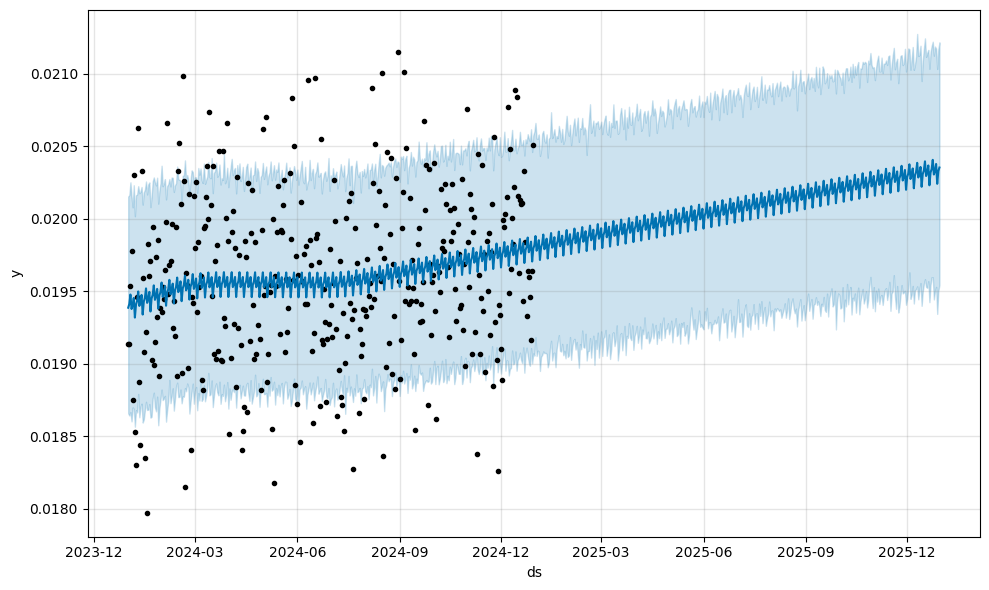

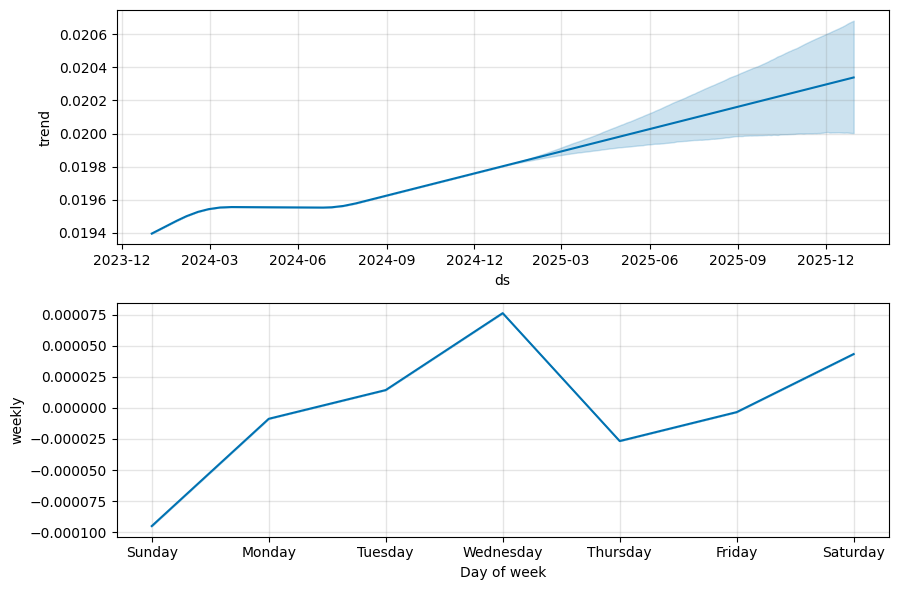

In [29]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Initialize Prophet model
model = Prophet()
model.fit(df)  # Train the model on the cleaned data

# Create future dataframe for predictions (365 days ahead)
future = model.make_future_dataframe(periods=365)

# Generate forecast
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.show()

# Plot components (trend, weekly & yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compare actual vs predicted values
y_true = df['y']
y_pred = forecast[:len(df)]['yhat']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5

print(f"MAE: {mae}, RMSE: {rmse}")


MAE: 0.0004658450269559477, RMSE: 0.0005833242557643323


C:\Users\PAVAN RAJ KAMAL\AppData\Local\Temp\ipykernel_27772\3934760230.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.set_index('ds').reindex(all_dates).fillna(method='ffill').reset_index()
10:01:21 - cmdstanpy - INFO - Chain [1] start processing
10:01:21 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.44650436170035696, RMSE: 0.5707825714818999


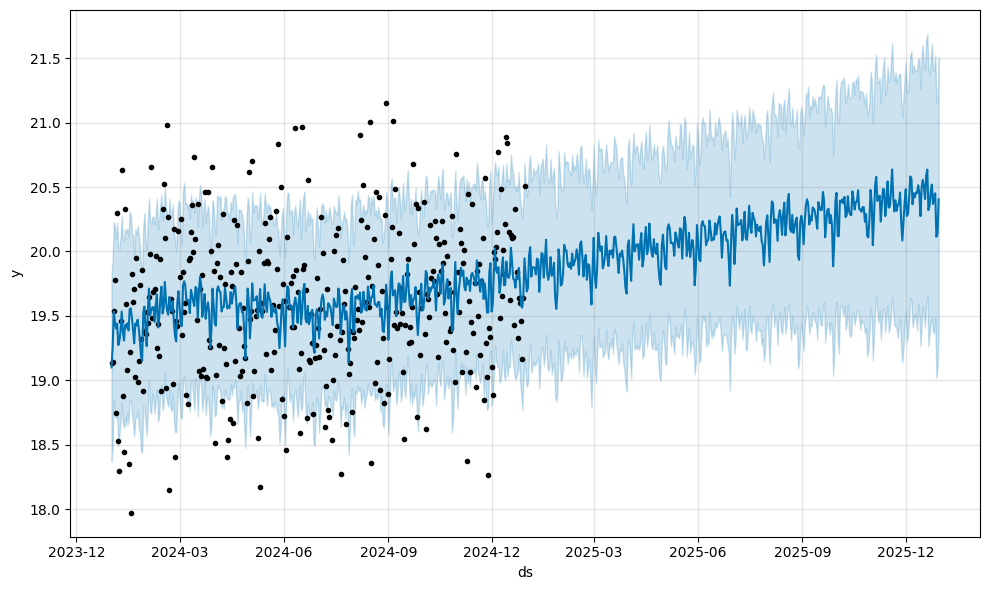

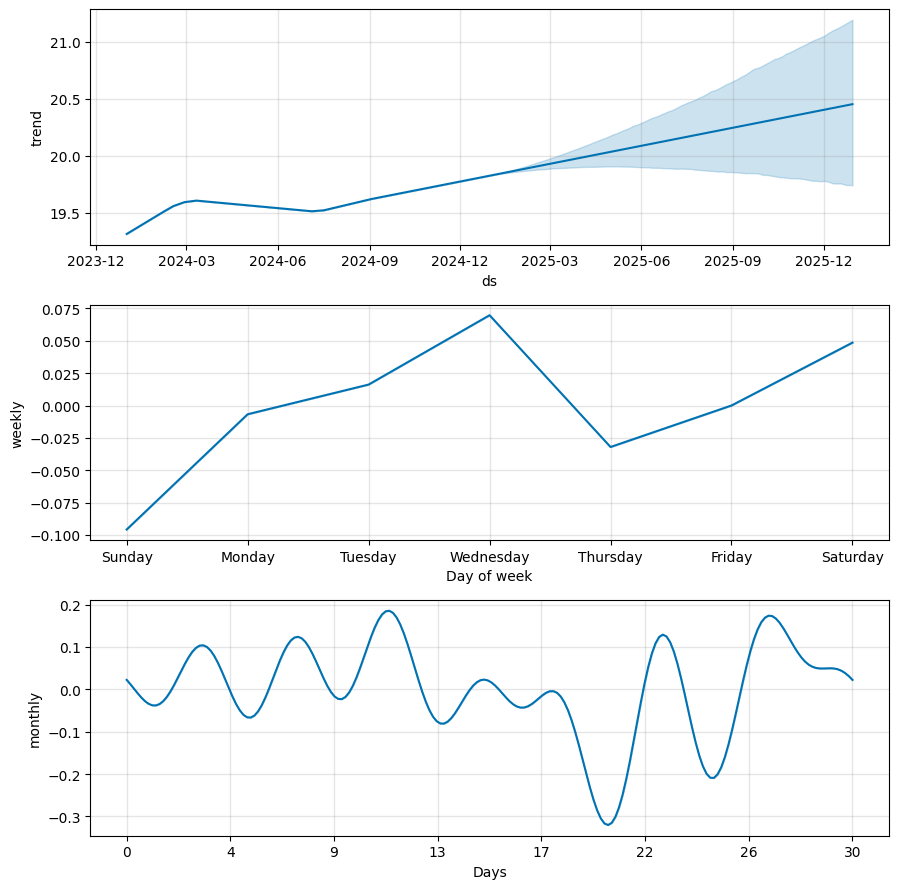

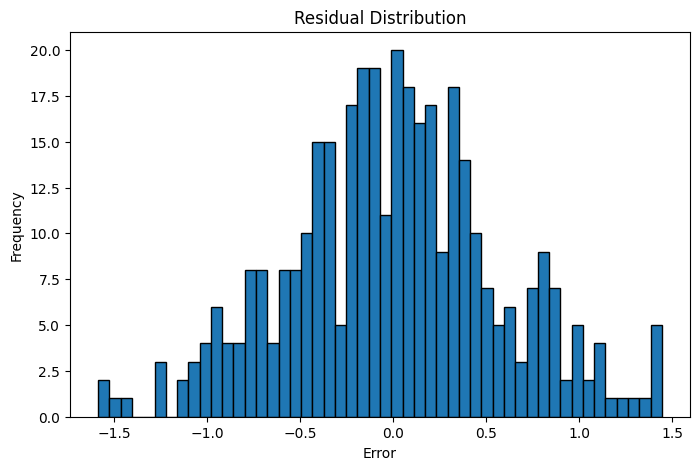

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1️⃣ **Data Preprocessing**
df = pd.read_csv("processed_retail_sales.csv")  # Load dataset
df['ds'] = pd.to_datetime(df['ds'])  # Convert 'ds' column to datetime

# Handling duplicates & missing dates
df = df.groupby('ds').mean().reset_index()  # Average values if duplicates exist

# Fill missing dates with forward fill
all_dates = pd.date_range(start=df['ds'].min(), end=df['ds'].max(), freq='D')
df = df.set_index('ds').reindex(all_dates).fillna(method='ffill').reset_index()
df.rename(columns={'index': 'ds'}, inplace=True)

# Sort data
df = df.sort_values('ds').reset_index(drop=True)

# 2️⃣ **Train a Prophet Model**
model = Prophet(
    changepoint_prior_scale=0.1  # Allow more trend flexibility
)
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)  # Improve seasonality modeling
model.fit(df)

# 3️⃣ **Make Forecasts**
future = model.make_future_dataframe(periods=365)  # Predict next 1 year
forecast = model.predict(future)

# 4️⃣ **Evaluation**
y_true = df['y'].values  # Actual values
y_pred = forecast['yhat'].iloc[:len(df)].values  # Predicted values for the same range

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"MAE: {mae}, RMSE: {rmse}")

# 5️⃣ **Visualization**
fig1 = model.plot(forecast)  # Forecast with confidence intervals
fig2 = model.plot_components(forecast)  # Trend & seasonality breakdown

# 6️⃣ **Residual Analysis**
residuals = y_true - y_pred
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title("Residual Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


20:43:29 - cmdstanpy - INFO - Chain [1] start processing
20:43:29 - cmdstanpy - INFO - Chain [1] done processing


📊 MAE: 0.42, 📉 RMSE: 0.54


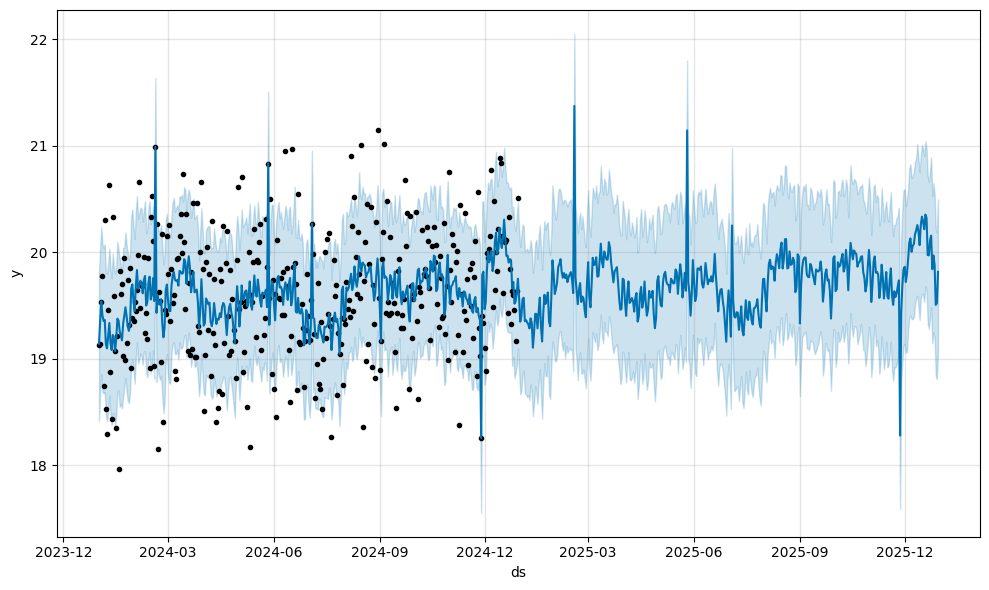

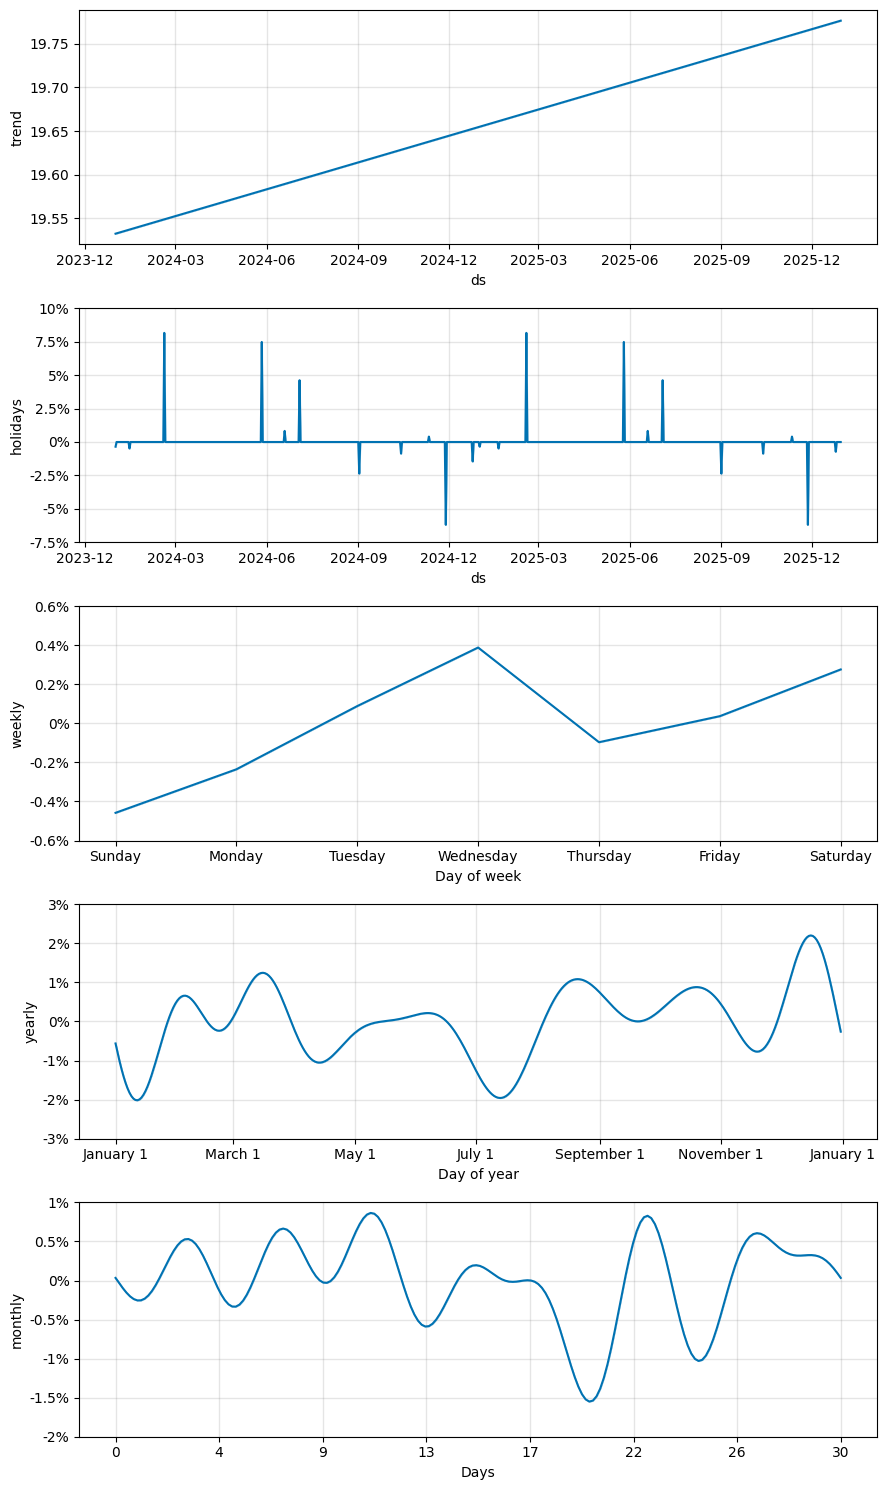

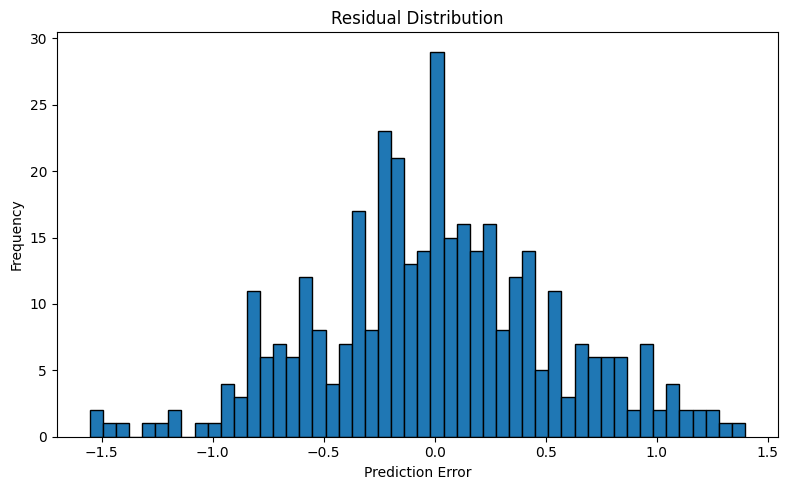

✅ Prophet model saved.


: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# 1️⃣ Load and preprocess data
df = pd.read_csv("processed_retail_sales.csv")  
df['ds'] = pd.to_datetime(df['ds'])

# Group duplicates, fill missing dates
df = df.groupby('ds').mean().reset_index()
all_dates = pd.date_range(start=df['ds'].min(), end=df['ds'].max(), freq='D')
df = df.set_index('ds').reindex(all_dates).ffill().reset_index()
df.rename(columns={'index': 'ds'}, inplace=True)

# Ensure 'y' column exists and sorted
df = df.sort_values('ds').reset_index(drop=True)
assert 'y' in df.columns, "Your dataset must contain a 'y' column for Prophet."

# 2️⃣ Initialize Prophet model with tuned parameters
model = Prophet(
    changepoint_prior_scale=0.15,       # Sensitive to trend shifts
    seasonality_prior_scale=10,         # Flexible seasonal weight
    seasonality_mode="multiplicative",  # Better for increasing sales
    daily_seasonality=False,
    yearly_seasonality=True             # Helpful for long-term patterns
)

# Manual seasonality tuning
model.add_seasonality(name='weekly', period=7, fourier_order=5)
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)

# 3️⃣ Add built-in + custom holidays
custom_holidays = pd.DataFrame({
    'ds': pd.to_datetime(['2024-12-25', '2025-01-01', '2025-07-04']),
    'holiday': ['Christmas', 'New Year', 'Independence Day']
})
model.holidays = pd.concat([
    model.holidays if model.holidays is not None else pd.DataFrame(),
    custom_holidays
], ignore_index=True)

model.add_country_holidays(country_name='US')  # Add built-in holiday support

# 4️⃣ Fit the model
model.fit(df)

# 5️⃣ Forecast for 365 days
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# 6️⃣ Evaluation on historical data
y_true = df['y'].values
y_pred = forecast['yhat'].iloc[:len(df)].values
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"📊 MAE: {mae:.2f}, 📉 RMSE: {rmse:.2f}")

# 7️⃣ Visualizations
model.plot(forecast)
model.plot_components(forecast)

# 8️⃣ Residual histogram
residuals = y_true - y_pred
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 9️⃣ Save trained model
joblib.dump(model, "prophet_sales_model.pkl")
print("✅ Prophet model saved.")



In [4]:
import joblib

# Save the model
joblib.dump(model, "prophet_sales_model.pkl")
print("✅ Prophet model saved as prophet_sales_model.pkl")


✅ Prophet model saved as prophet_sales_model.pkl


In [5]:
from joblib import load
import pandas as pd

# Load your Prophet model
prophet_model = load("models/prophet_sales_model.pkl")

# Create future dataframe for next 30 days
future_df = prophet_model.make_future_dataframe(periods=30)

# Predict
forecast_df = prophet_model.predict(future_df)

# Show forecast
forecast_df[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10)


,ds,yhat,yhat_lower,yhat_upper
385,2025-01-20,19.392360,18.664815,20.085641
386,2025-01-21,19.828608,19.055209,20.585145
387,2025-01-22,19.964287,19.232749,20.682346
388,2025-01-23,19.855110,19.110907,20.595242
389,2025-01-24,19.857239,19.151875,20.544170
390,2025-01-25,19.876013,19.081836,20.541207
391,2025-01-26,19.573225,18.852952,20.275674
392,2025-01-27,19.507026,18.792409,20.215619
393,2025-01-28,19.755250,18.995337,20.433846
394,2025-01-29,20.072313,19.365269,20.780938
